In [ ]:
d1 = 'this is a document'
d2 = 'this is another document'
d3 = 'random text here'

In [ ]:
index = {
    'this':[2,[d1,1],[d2,1]],
    'is': [2,[d1,1],[d2,1]],
    'document': [2,[d1,1],[d2,1]],
    'random': [1,[d3,1]],
    'text': [1,[d3,1]],
    'here': [1,[d3,1]],
}

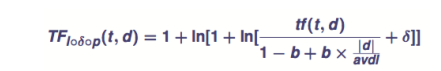

In [11]:
import math
import numpy as np

def idf(num_of_docs, num_of_docs_with_term):
    return float(math.log(num_of_docs/num_of_docs_with_term)) #log base?

def tf_p(term_frequency, max_frequency, doc_length, average_doc_length, delta, b = 0.75):
    tf = float(term_frequency/max_frequency)
    s = tf / (1 - b + b * (doc_length/average_doc_length))
    a = 1 + np.log(s + delta)
    tf_p = float(1 + np.log(a))
    return tf_p

tfidf = idf(10,3) * tf_p(20, 20, 100, 400, 0.1)
print(tfidf)

1.9572627706696366
